In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [6]:
df=pd.read_csv('/content/drive/MyDrive/fraud detector/creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
print('NUmber of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

NUmber of rows:  284807
Number of columns:  31


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: xlabel='Class'>

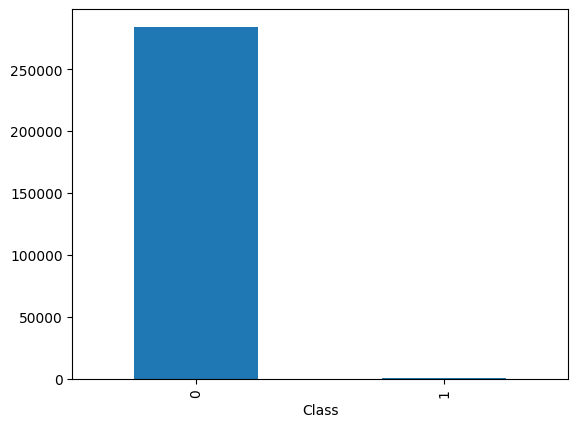

In [10]:
df['Class'].value_counts().plot(kind='bar')

In [15]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [18]:
#DATA PREPROCESSING

df.isnull().any().sum()

0

In [19]:
df.duplicated().sum()

1081

In [28]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [32]:
x=df.drop('Class',axis=1)
y=df['Class']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [37]:
smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [36]:
y_train_smote.value_counts()

,count
Class,
0,226602
1,226602


In [39]:
scaler=StandardScaler()
x_train_smote=scaler.fit_transform(x_train_smote)
x_test=scaler.transform(x_test)

In [40]:
log=LogisticRegression(random_state=42)
log.fit(x_train_smote,y_train_smote)

LogisticRegression(random_state=42)

In [41]:
y_pred=log.predict(x_test)

In [44]:
print("Accuracy:", {accuracy_score(y_test, y_pred)})

Accuracy: {0.99115356148451}


In [48]:
report=classification_report(y_test,y_pred)
print('Classification Report: \n',report)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.14      0.85      0.24        95

    accuracy                           0.99     56746
   macro avg       0.57      0.92      0.62     56746
weighted avg       1.00      0.99      0.99     56746



In [49]:
roc_auc=roc_auc_score(y_test,y_pred)
print('Roc Auc Score : ',roc_auc)

Roc Auc Score :  0.9220087163417007
